# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | east london
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | mar del plata
Processing Record 4 of Set 1 | kolonia town
Processing Record 5 of Set 1 | nar'yan-mar
Processing Record 6 of Set 1 | makakilo city
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | polyarnyy
Processing Record 10 of Set 1 | camana
Processing Record 11 of Set 1 | utrik
Processing Record 12 of Set 1 | alliance
Processing Record 13 of Set 1 | cafayate
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | vanimo
Processing Record 17 of Set 1 | ust-nera
Processing Record 18 of Set 1 | papatowai
Processing Record 19 of Set 1 | nemuro
Processing Record 20 of Set 1 | eqbaliyeh
Processing Record 21 of Set 1 | puerto natales
Processing Record 22 of Set 1 | qaqort

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,east london,-33.0153,27.9116,20.86,80,98,3.05,ZA,1712603298
1,adamstown,-25.0660,-130.1015,23.75,84,75,2.69,PN,1712603229
2,mar del plata,-38.0023,-57.5575,26.08,53,20,7.15,AR,1712603522
3,kolonia town,6.9640,158.2060,26.00,94,100,2.06,FM,1712603721
4,nar'yan-mar,67.6713,53.0870,-18.83,100,71,2.24,RU,1712603721


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,east london,-33.0153,27.9116,20.86,80,98,3.05,ZA,1712603298
1,adamstown,-25.0660,-130.1015,23.75,84,75,2.69,PN,1712603229
2,mar del plata,-38.0023,-57.5575,26.08,53,20,7.15,AR,1712603522
3,kolonia town,6.9640,158.2060,26.00,94,100,2.06,FM,1712603721
4,nar'yan-mar,67.6713,53.0870,-18.83,100,71,2.24,RU,1712603721


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

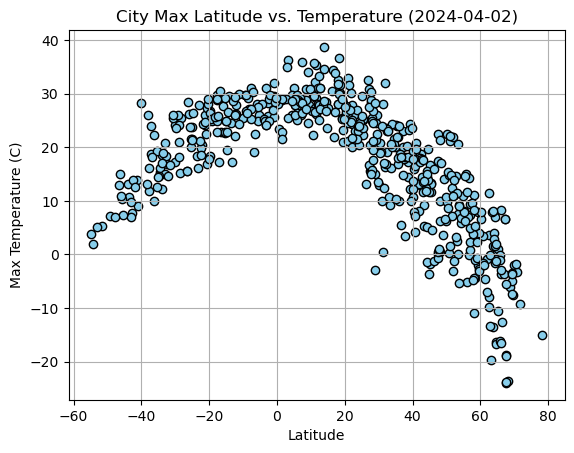

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-04-02)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

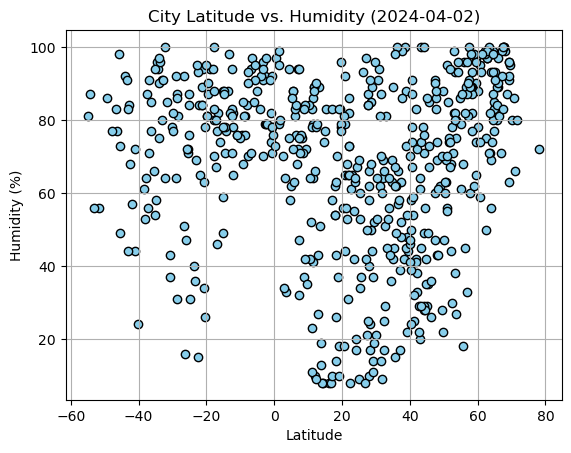

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-04-02)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

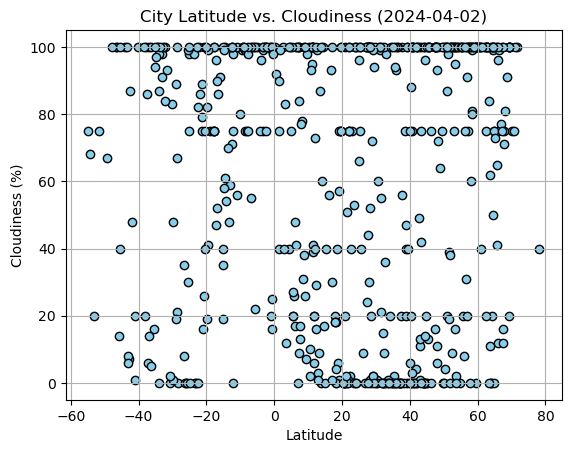

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-04-02)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

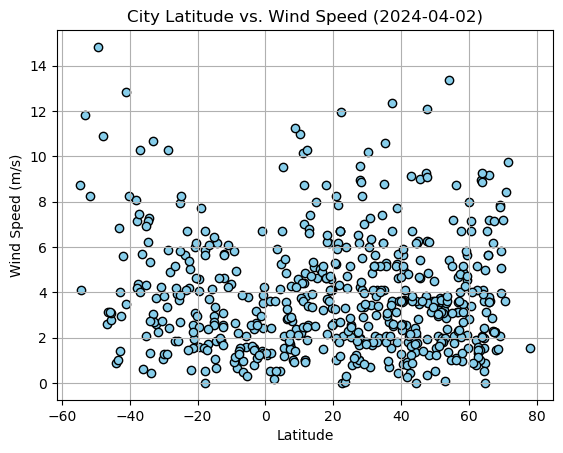

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-04-02)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, 'r', label=line_eq)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')

    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f'The r-value is: {rvalue**2}')
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,kolonia town,6.9640,158.2060,26.00,94,100,2.06,FM,1712603721
4,nar'yan-mar,67.6713,53.0870,-18.83,100,71,2.24,RU,1712603721
5,makakilo city,21.3469,-158.0858,26.18,53,0,6.17,US,1712603721
8,polyarnyy,69.1989,33.4478,-3.59,91,100,7.84,RU,1712603722
10,utrik,11.2278,169.8474,26.63,83,100,10.15,MH,1712603722


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,east london,-33.0153,27.9116,20.86,80,98,3.05,ZA,1712603298
1,adamstown,-25.0660,-130.1015,23.75,84,75,2.69,PN,1712603229
2,mar del plata,-38.0023,-57.5575,26.08,53,20,7.15,AR,1712603522
6,edinburgh of the seven seas,-37.0676,-12.3116,18.73,91,100,10.28,SH,1712603228
7,port-aux-francais,-49.3500,70.2167,7.21,86,67,14.83,TF,1712603722


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7451561265048902


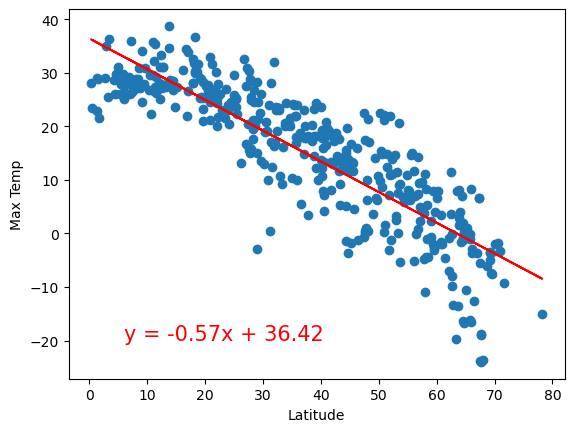

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

plot_linear_regression(x_values,y_values, 'Max Temp', (6,-20))

The r-value is: 0.6573456630489886


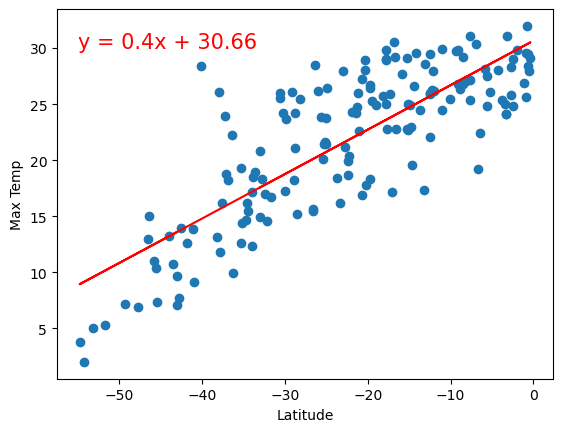

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

plot_linear_regression(x_values,y_values, 'Max Temp', (-55,30))

**Discussion about the linear relationship:** Both plots show a positive correlation between temperature and latitude, indicating that the temperature tends to increase as you move closer to the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.08966327500325716


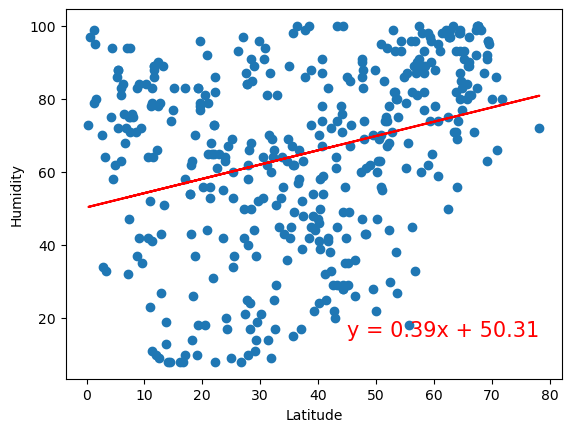

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

plot_linear_regression(x_values,y_values, 'Humidity', (45,15))

The r-value is: 0.04685489059543261


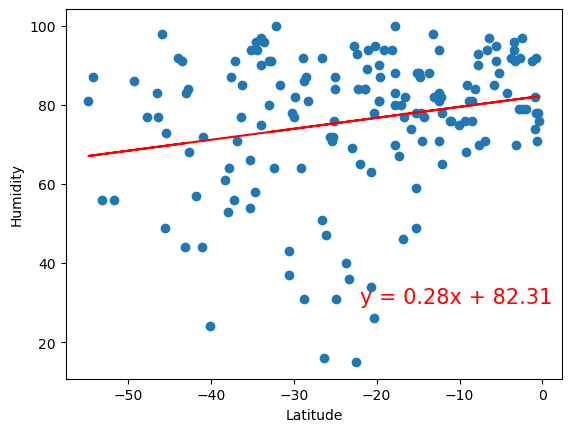

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

plot_linear_regression(x_values,y_values, 'Humidity', (-22,30))

**Discussion about the linear relationship:** The linear regression lots indicate that there is very weak positive correlation between humidity and latitude in both the northern and southern hemispheres. This may show that latitude has little to none influence on humidity levels. There could be other factors that play a more significant role in determining humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.031899152352250965


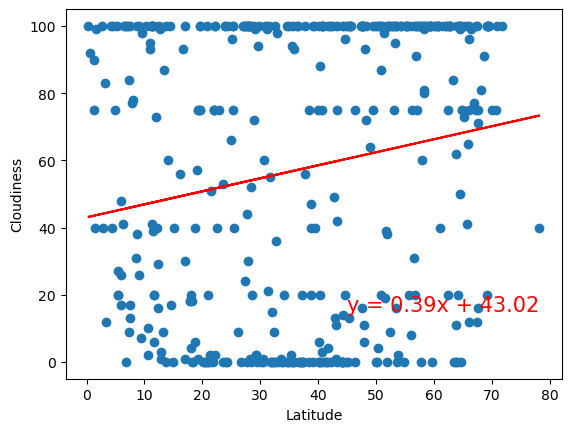

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

plot_linear_regression(x_values,y_values, 'Cloudiness', (45,15))

The r-value is: 0.046881444216656416


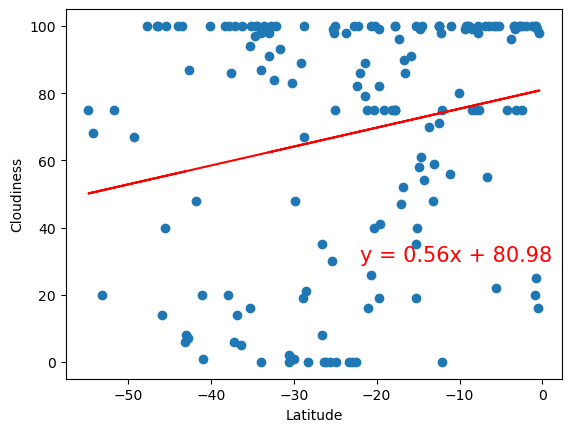

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

plot_linear_regression(x_values,y_values, 'Cloudiness', (-22,30))

**Discussion about the linear relationship:** The linear regression lots indicate that there is very weak positive correlation between cloudiness and latitude in both the northern and southern hemispheres. This may show that latitude has little to none influence on cloudiness levels. There could be other factors that play a more significant role in determining cloudiness levels.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 5.365206778183086e-07


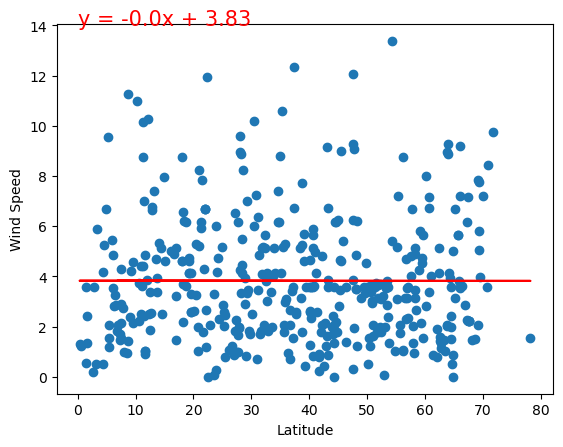

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

plot_linear_regression(x_values,y_values, 'Wind Speed', (0,14))

The r-value is: 0.17422341944596126


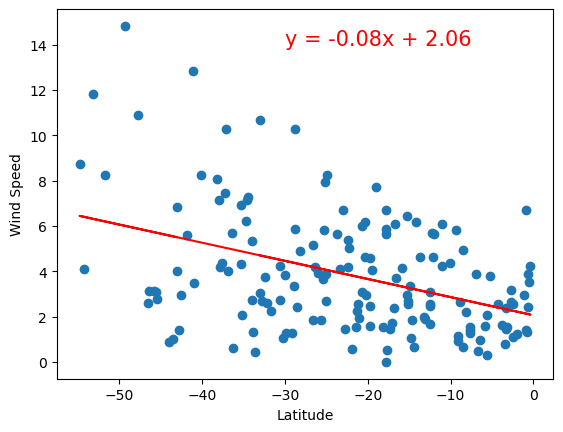

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,14))

**Discussion about the linear relationship:** The linear regression lots indicate that there is very weak positive correlation between wind speed and latitude in both the northern and southern hemispheres. This may show that latitude has little to none influence on wind speed levels. There could be other factors that play a more significant role in determining wind speed levels.